In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

# Preparación del dataset

In [6]:
base = '../FER2013/'

paths = []
labels = []
names = []

for level_1_dir in os.listdir(base):
    level_1_path = os.path.join(base, level_1_dir)
    if os.path.isdir(level_1_path):
        for level_2_dir in os.listdir(level_1_path):
            level_2_path = os.path.join(level_1_path, level_2_dir)
            if os.path.isdir(level_2_path):
                for file in os.listdir(level_2_path):
                    file_path = os.path.join(level_2_path, file)
                    if os.path.isfile(file_path):
                        paths.append(file_path)
                        labels.append(level_2_dir)
                        names.append(file)

df = pd.DataFrame({'path': paths, 'label': labels,'name': names})

def load_and_preprocess_image(path):
    image_color = cv2.imread(path)
    gray_image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    return gray_image

df['gray_matrix'] = df['path'].apply(load_and_preprocess_image)


In [7]:
images=df['gray_matrix'].to_numpy()

In [12]:
np.save('../DatosDF/labels.npy', labels)
np.save('../DatosDF/images.npy', images)
np.save('../DatosDF/names.npy', names)

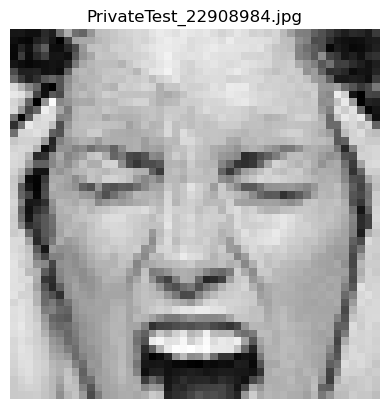

In [9]:
a=69
plt.imshow(images[a], cmap='gray')
plt.axis('off')  # Desactiva los ejes
plt.title(names[a])
plt.show()